In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

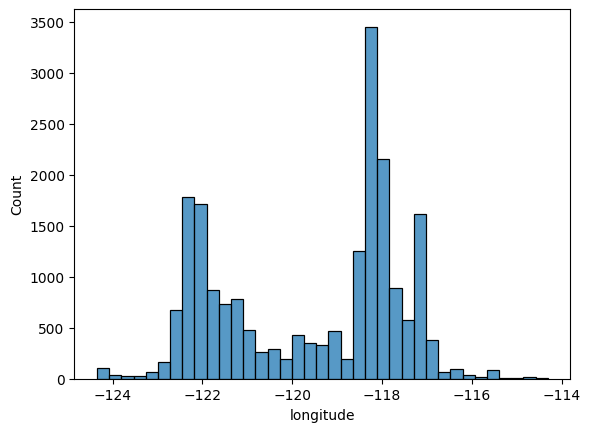

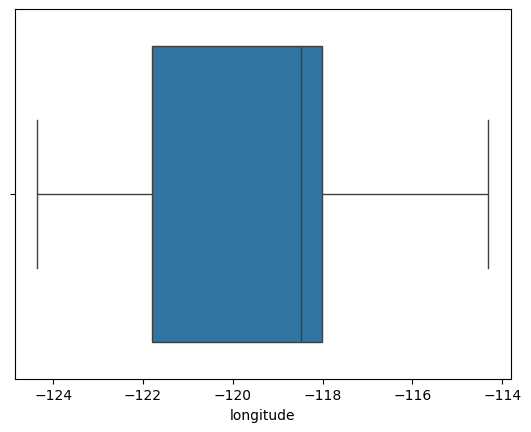

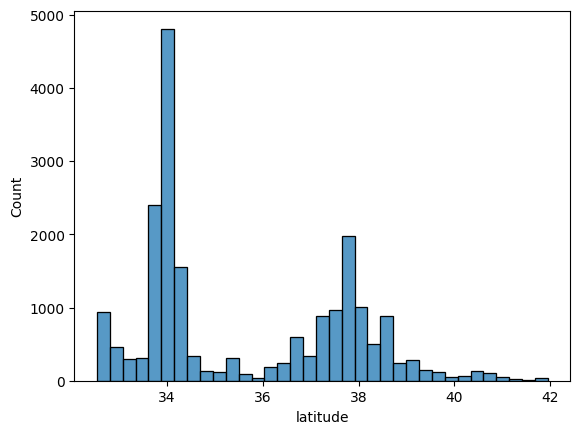

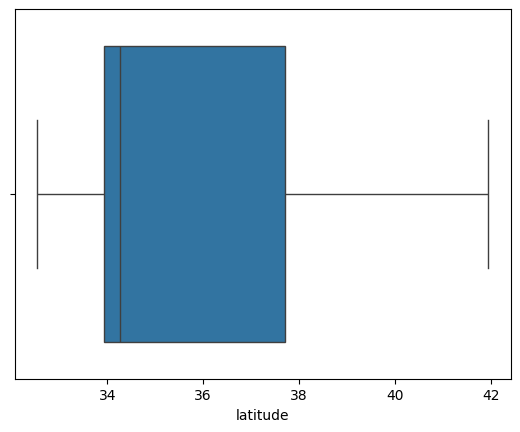

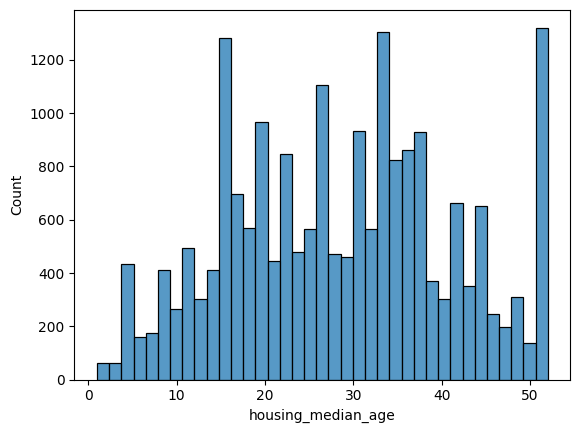

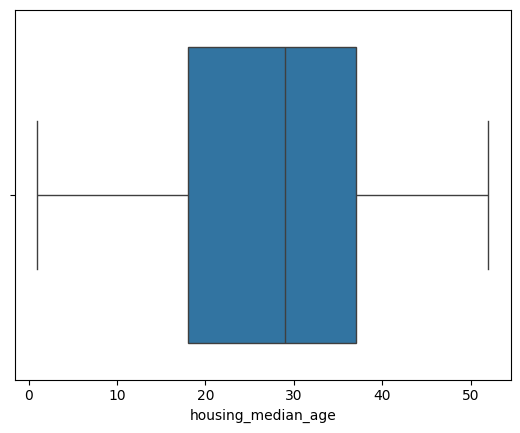

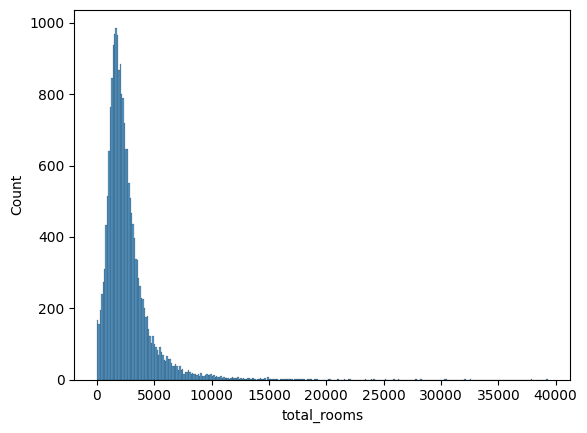

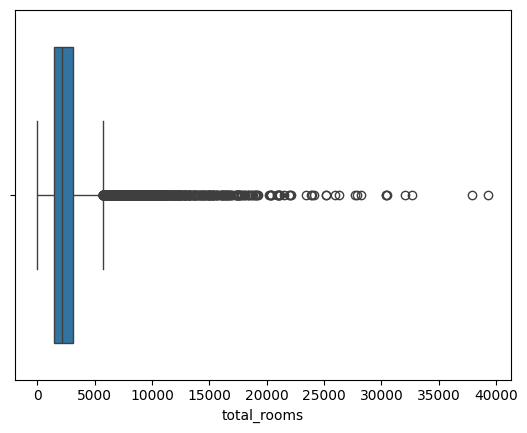

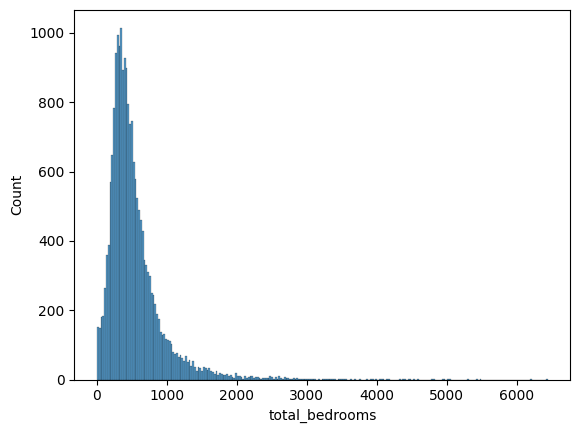

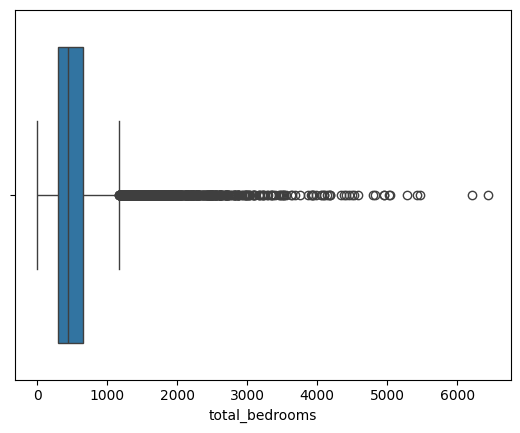

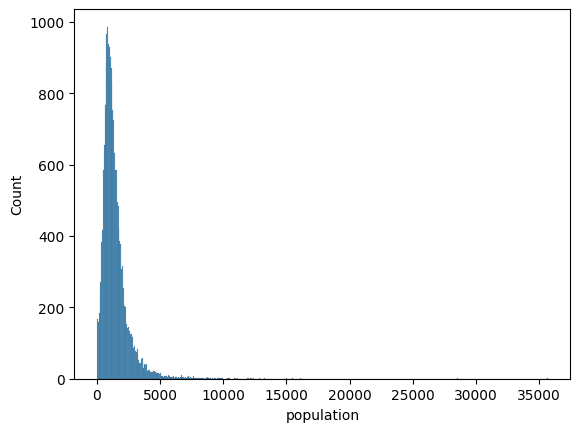

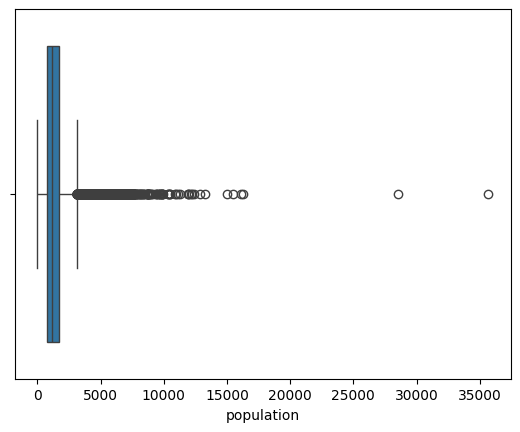

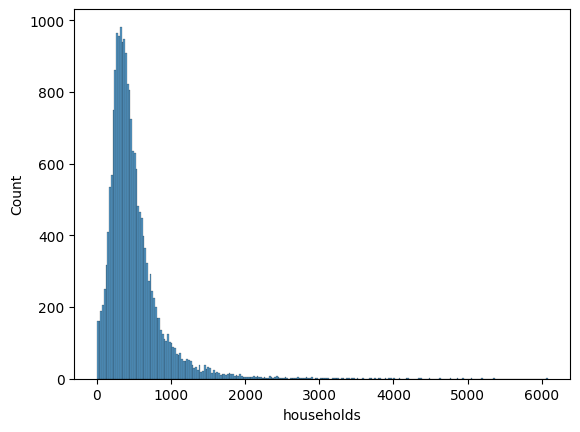

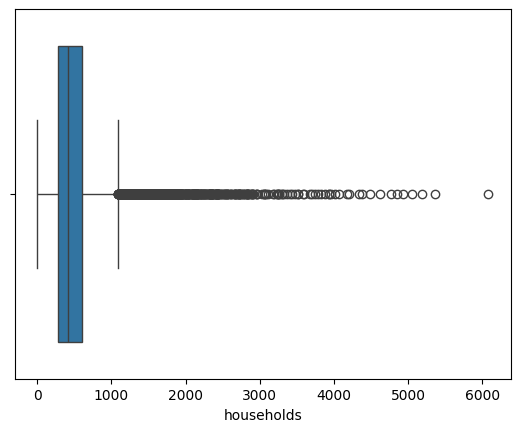

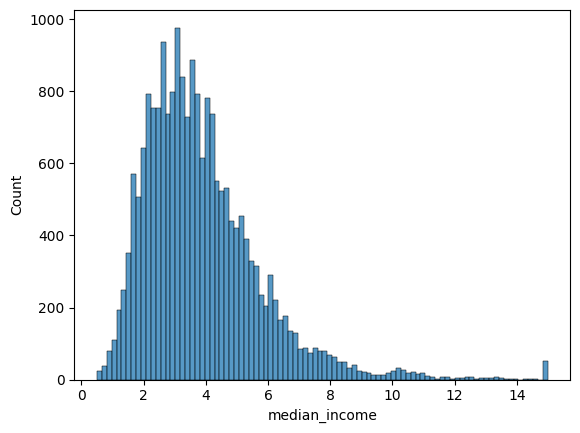

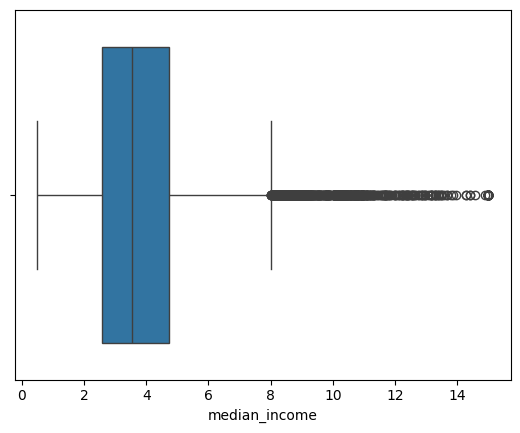

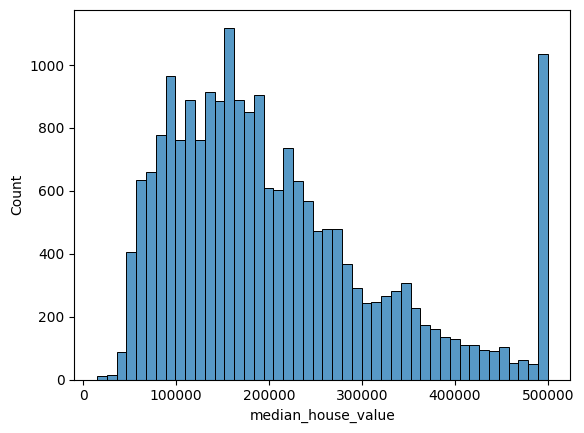

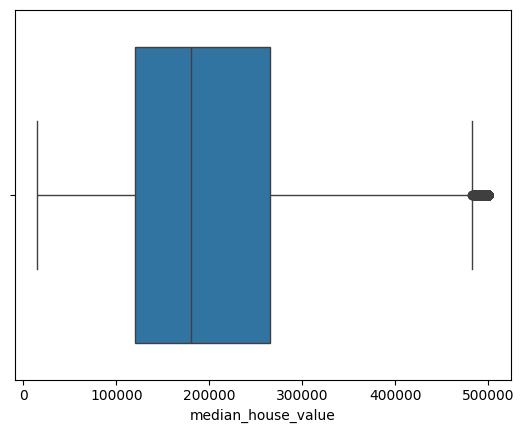

In [7]:
for i in df:
    if df[i].dtype == 'float64':
        sns.histplot(data=df,x=i)
        plt.show()
        sns.boxplot(data=df,x=i)
        plt.show()

<Axes: xlabel='ocean_proximity', ylabel='count'>

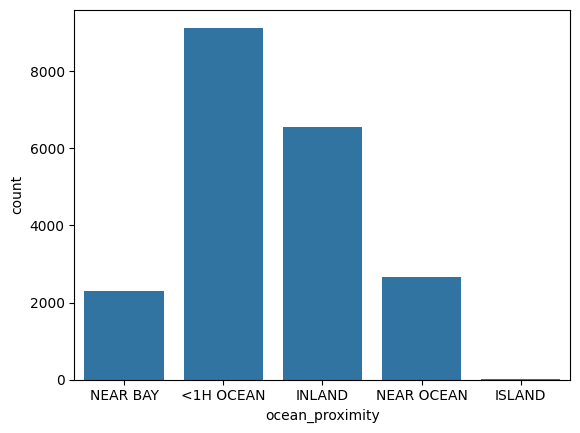

In [8]:
sns.countplot(x=df['ocean_proximity'],data=df)

In [9]:
from sklearn.impute import SimpleImputer
bedroom = df['total_bedrooms'].values.reshape((-1,1))
si = SimpleImputer(strategy='median')
bedroom = si.fit_transform(bedroom)
df['total_bedrooms']=bedroom

In [10]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [14]:
X = df.drop(columns=['median_house_value'])
y=df['median_house_value']

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['NEAR BAY','NEAR OCEAN','<1H OCEAN','INLAND','ISLAND']])
oc = X['ocean_proximity'].values.reshape((-1,1))
X['ocean_proximity']=oe.fit_transform(oc)

In [16]:
X.to_csv('X.csv',index=False)
y.to_csv('y.csv',index=False)